# Titanic Exploratory Data Analysis

Get everything set up. Import the data and modules needed for the EDA.

In [61]:
# Import modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling
import missingno
from scipy import stats

In [62]:
# Import data CSV and place it in a data frame.
df = pd.read_csv("Titanic.csv")

# Quick check of headings
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
print(df.shape)

(891, 12)


There are 891 records, 12 variables. Some variables may not be helpful, some data may be missing.

## Data cleaning and pre-processing

In [64]:
# Look for missing values in data.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We clearly have 3 issues with the missing data: Age and Cabin data have a lot of missing gaps. We will need to look into those and determine what to do with the gaps / data series.

In [65]:
# Look at age data next.
print(df['Age'].unique())

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


There are a 177 missing values for age. In order to keep those records, we will set missing values to the median.

In [66]:
df['Age'] = df['Age'].fillna(df['Age'].median())

# Quick check on the values we now have for age.
print(df['Age'].unique())

[22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]


The embarked variable contains 2 missing values. It would be best to use mode to fill these as it is an object.

In [67]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Check to make sure there are no gaps left in the data.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

 Passenger ID, cabin number, ticket code, and passenger name will not provide any useful insights for this task, so the columns are dropped

In [68]:
df.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'],axis=1, inplace=True)

In [69]:
# See if any columns need renaming.
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Visualise the data

[Text(0.5, 1.0, 'What proportion of people survived?')]

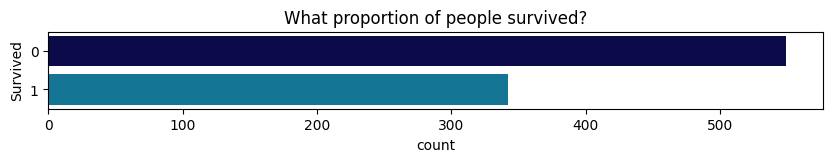

In [70]:
# Visualise how many people survived.
survival = plt.figure(figsize=(10,1))
sns.countplot(y=df['Survived'], data=df, palette='ocean').set(title='What proportion of people survived?')

A pairplot is a quick way to look for any obvious correlations between the variables.

c:\Users\scien\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\scien\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\scien\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\scien\App

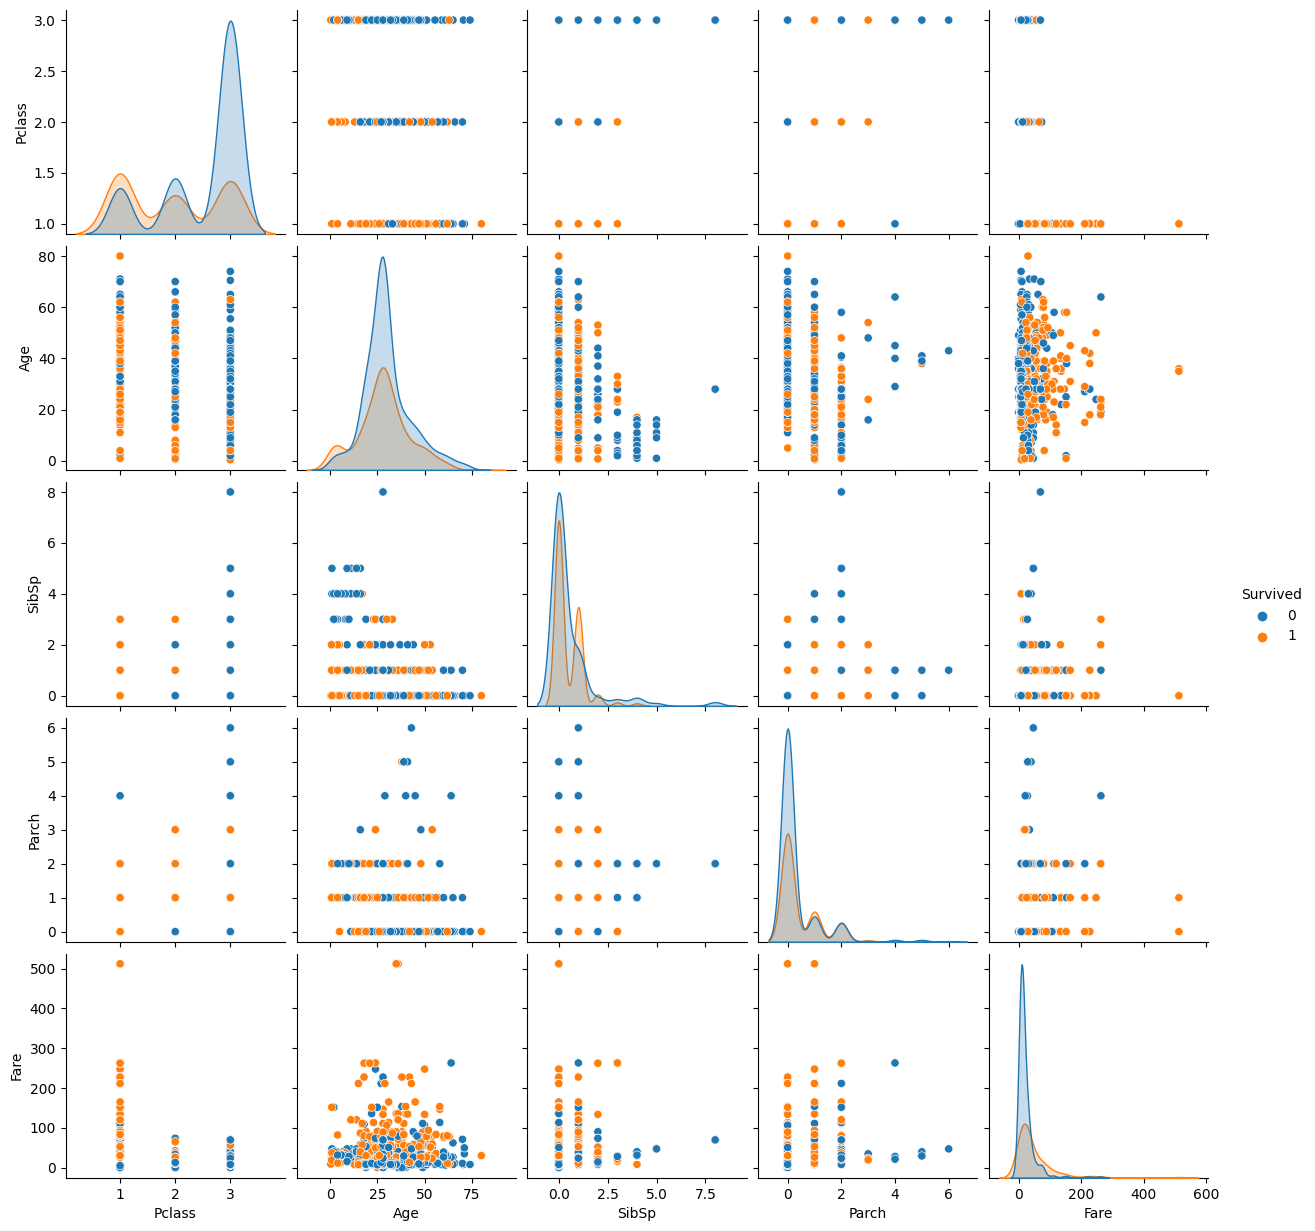

In [71]:
sns.pairplot(df, hue="Survived")

It looks like class makes a difference to survival rate, as does fare (although fare is strongly correlated to class, and is pretty much showing the same thing).

c:\Users\scien\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\scien\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\scien\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


[Text(0.5, 1.0, 'Relationship between fare and Pclass, with survival visualised')]

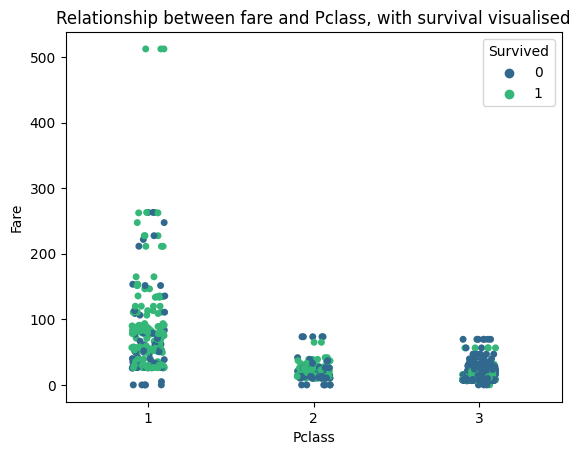

In [72]:
# Look at the relationship between fare and pclass to test this assumption.
sns.stripplot(df, x='Pclass', y='Fare', hue='Survived', 
              palette='viridis').set(title='Relationship between fare and Pclass, with survival visualised')

This graph is interesting, it shows little difference in the cost of 2nd and 3rd class tickets - but survival still appears to be reduced for 3rd class passengers.

This could be partially because there is a significant difference in sample size and cost variability between the classes. A boxplot should show this.

[Text(0.5, 1.0, 'Variability in ticket pricing per passenger class')]

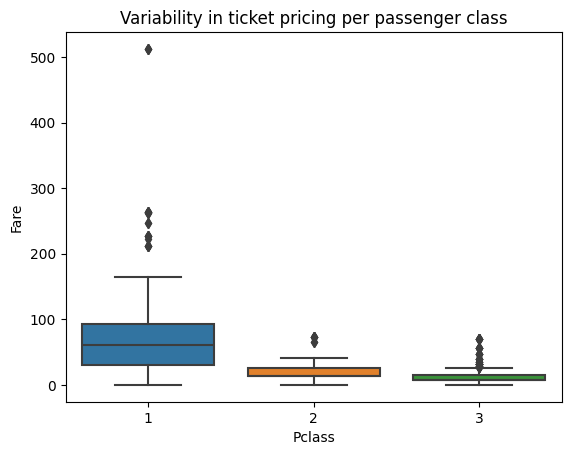

In [73]:
sns.boxplot(df, x='Pclass', y='Fare').set(title='Variability in ticket pricing per passenger class')

The range of 1st class ticket prices has altered the Y axis (especially the outlier at more than £500), so that it is hard to see the difference between 2nd and 3rd class ticket prices. It would be better to make a plot without 1st class tickets.

[Text(0.5, 1.0, 'Comparison of ticket prices for 2nd and 3rd passenger class')]

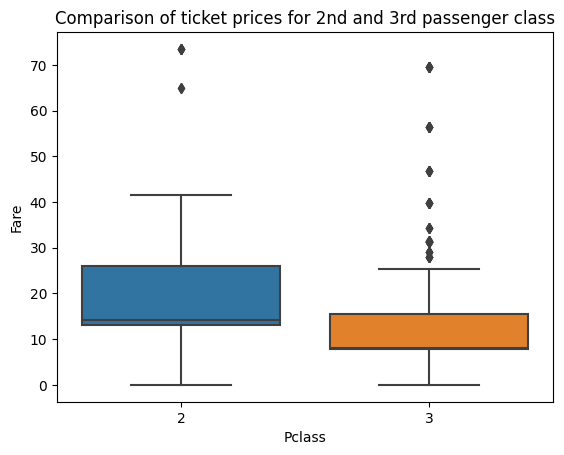

In [74]:
second_third = df.drop(df[df.Pclass == 1].index)
sns.boxplot(second_third, x='Pclass', 
            y='Fare').set(title='Comparison of ticket prices for 2nd and 3rd passenger class')

We can see there is a difference (although not statistically significant) between ticket costs for the majority of 2nd and 3rd class tickets. This implies 3rd class ticket holders were less likely to survive due to their passenger class, NOT their ticket price.

In [75]:
# How many people in each class.
class_group = df.groupby('Pclass')['Pclass']
print(f"Number of tickets sold per passenger class: ", class_group.count())

Number of tickets sold per passenger class:  Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


### Visualise survival rate in each class.

c:\Users\scien\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\scien\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\scien\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\scien\App

([<matplotlib.axis.XTick at 0x21953d0d850>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

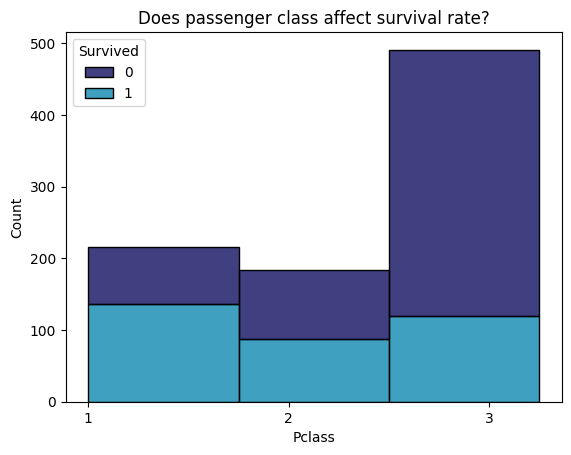

In [76]:
sns.histplot(df, x='Pclass', hue='Survived', multiple='stack', 
             binwidth=0.75, palette='ocean').set(title='Does passenger class affect survival rate?')
plt.xticks([1,2,3])

It is clear that 3rd class passengers were much less likely to survive, compared to 1st and 2nd class. This is likely to support the hypothesis about upper-class passengers having greater access to lifeboats.

### Did women and children have a higher survival rate?

C:\Users\scien\AppData\Local\Temp\ipykernel_23440\2119159127.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men['W&C_or_man'] = 'men'
C:\Users\scien\AppData\Local\Temp\ipykernel_23440\2119159127.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_and_children['W&C_or_man'] = 'women or children'
c:\Users\scien\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf val

[Text(0.5, 1.0, 'Were women and children more likely to survive than men?')]

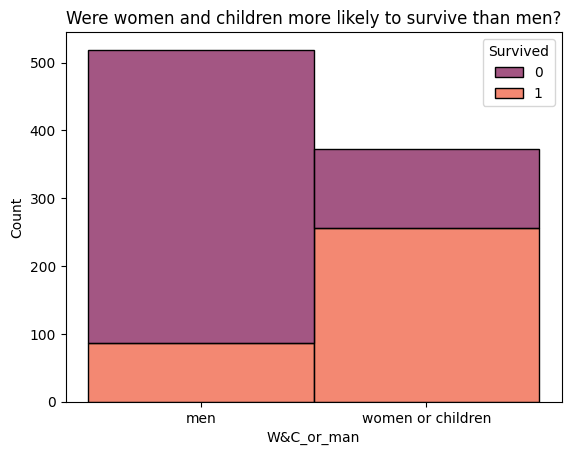

In [77]:
# Split all passengers into two groups: men; women and children.
# Create a new slice for each group.

men = df[(df['Sex'] == 'male') & (df['Age'] >= 18)]
women_and_children = df[(df['Sex'] == 'female') | (df['Age'] < 18)]

# Set a new column as an identifier, ready to concatenate slices.
men['W&C_or_man'] = 'men'
women_and_children['W&C_or_man'] = 'women or children'

# Concatenate columns of interest.
columns_to_keep = ['Survived', 'W&C_or_man']
men_women_child_compare = pd.concat([men[columns_to_keep], 
                                     women_and_children[columns_to_keep]], ignore_index=True)

# Visualise this data.
sns.histplot(men_women_child_compare, x='W&C_or_man', hue='Survived', multiple='stack',
              binwidth=0.6, palette='rocket').set(title='Were women and children more likely to survive than men?')

Men were indeed much less likely to survive than women, so the adage "Women and children first" appears to be supported by this evidence.

## **Conlcusions**

*It seems the most important factors with regard to "survivability" are **"Sex"** and **"Passenger class"**. It is interesting to also note that, although there is great variability in the prices paid for tickets (possibly due to how far in advance they were purchased), the passengers' class is far more important than the amount they paid for their ticket. This could be worth investigating statistically.* [^1]






[^1]: This is beyond the remit of the task, as a great deal of processing would be required.